In [2]:
import nltk

In [ ]:
# nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\shibi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\shibi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\shibi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\shibi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\shibi\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     C:\Users\s

In [3]:
import textblob
import glob

In [4]:
from nltk.stem import WordNetLemmatizer

In [5]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [6]:
import re
import pandas as pd
import numpy as np
from wordcloud import WordCloud

In [7]:
import random
from PIL import Image
import matplotlib.pyplot as plt

In [8]:
from textblob import TextBlob

In [81]:
data_dir = 'C:/IMSProSchool/DS3/reddit_data/reddit_data/'

In [122]:
file_list = glob.glob(data_dir + '*.csv')

In [123]:
df_list = [pd.read_csv(filename, lineterminator='\n') for filename in glob.glob(data_dir + '*.csv')]
input_df = pd.concat(df_list, axis = 0)

In [124]:
input_df.head()

,Unnamed: 0,article,article_date
0,0,Can you see a u-turn here: http://www.financia...,2014-06-01 00:13:06
1,1,He may be a shit (even though he is still an e...,2014-06-01 00:13:30
2,2,It was a fuck-ton of spam-ish posts by him say...,2014-06-01 00:28:51
3,3,Modi moving fast,2014-06-01 00:57:49
4,4,1. Jairam Ramesh said it first and the very sa...,2014-06-01 01:03:42


In [125]:
tweets_df = input_df[['article']]
tweets_df.columns = ['tweet']

In [126]:
tweets_df

,tweet
0,Can you see a u-turn here: http://www.financia...
1,He may be a shit (even though he is still an e...
2,It was a fuck-ton of spam-ish posts by him say...
3,Modi moving fast
4,1. Jairam Ramesh said it first and the very sa...
5,"Din't the AAPtards shout ""Sheila haari hai, ab..."
6,This guy is just mad that Modi left him out of...
7,... and that is the reason he was left out in ...
8,What happened? He was full of praise for Modi ...
9,100 party system is not democracy. Its crap.\n...


In [127]:
def remove_urls(input_text):
    tokens = input_text.split()
    clean_tokens = [word for word in tokens 
                   if 'http' not in word and
                   '@' not in word and 
                   '<' not in word and 
                   'RT' not in word]
    return ' '.join(clean_tokens)

In [128]:
tweets_df['tweet'] = tweets_df['tweet'].apply(remove_urls)

C:\Users\shibi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [129]:
tweets_df.head()

,tweet
0,Can you see a u-turn here: ?
1,He may be a shit (even though he is still an e...
2,It was a fuck-ton of spam-ish posts by him say...
3,Modi moving fast
4,1. Jairam Ramesh said it first and the very sa...


In [130]:
def convert_lower(input_text):
    return input_text.lower()

In [131]:
tweets_df['tweet'] = tweets_df['tweet'].apply(convert_lower)

C:\Users\shibi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [132]:
#tweets_df = tweets_df.drop(['tweet1'], axis = 1)

In [133]:
tweets_df

,tweet
0,can you see a u-turn here: ?
1,he may be a shit (even though he is still an e...
2,it was a fuck-ton of spam-ish posts by him say...
3,modi moving fast
4,1. jairam ramesh said it first and the very sa...
5,"din't the aaptards shout ""sheila haari hai, ab..."
6,this guy is just mad that modi left him out of...
7,... and that is the reason he was left out in ...
8,what happened? he was full of praise for modi ...
9,100 party system is not democracy. its crap. 2...


# Clean Punctuation

##### Anything which is not a word (\w) or a space(\s) will be replaced by ''

In [134]:
### The below convertion can be done by below def
#####

## tweets_df['tweet'] = tweets_df['tweet'].str.replace('[^\w\s]', '')

In [135]:
def remove_special_char(input_string):
    tokens = input_string.split()
    clean_tokens = [re.sub('[^a-z0-9]', '', token) for token in tokens]
    return ' '.join(clean_tokens)

tweets_df['tweet'] = tweets_df['tweet'].apply(remove_special_char)

C:\Users\shibi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [136]:
tweets_df

,tweet
0,can you see a uturn here
1,he may be a shit even though he is still an el...
2,it was a fuckton of spamish posts by him sayin...
3,modi moving fast
4,1 jairam ramesh said it first and the very sam...
5,dint the aaptards shout sheila haari hai ab mo...
6,this guy is just mad that modi left him out of...
7,and that is the reason he was left out in the...
8,what happened he was full of praise for modi j...
9,100 party system is not democracy its crap 2 i...


In [137]:
## Remove stopwords

In [138]:
def remove_stopwords(input_text):
    stopwords_list = set(stopwords.words('english'))
    tokens = input_text.split()
    stop_words_removed = [token for token in tokens 
                         if token not in stopwords_list]
    return ' '.join(stop_words_removed)

tweets_df['tweet'] = tweets_df['tweet'].apply(remove_stopwords)

C:\Users\shibi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [139]:
tweets_df

,tweet
0,see uturn
1,may shit even though still elected leader peop...
2,fuckton spamish posts saying christians goa ge...
3,modi moving fast
4,1 jairam ramesh said first people jerking quot...
5,dint aaptards shout sheila haari hai ab modi k...
6,guy mad modi left circle thank god modi smart ...
7,reason left cold modi guys gotta know stop mot...
8,happened full praise modi last week seems joke
9,100 party system democracy crap 2 probably rea...


In [140]:
## Remove Numerical values

In [141]:
def remove_numerical(input_text):
    return re.sub('[0-9]', '', input_text)

tweets_df['tweet'] = tweets_df['tweet'].apply(remove_numerical)

C:\Users\shibi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [142]:
tweets_df

,tweet
0,see uturn
1,may shit even though still elected leader peop...
2,fuckton spamish posts saying christians goa ge...
3,modi moving fast
4,jairam ramesh said first people jerking quote...
5,dint aaptards shout sheila haari hai ab modi k...
6,guy mad modi left circle thank god modi smart ...
7,reason left cold modi guys gotta know stop mot...
8,happened full praise modi last week seems joke
9,party system democracy crap probably reactio...


In [143]:
def remove_small_words(input_text):
    #tokens = input_text.split()
    #small_words = [token for token in tokens if len(tokens) >= 3]
    return re.sub(r'\b\w{1,2}\b', '', input_text)

tweets_df['tweet'] = tweets_df['tweet'].apply(remove_small_words)

C:\Users\shibi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [144]:
tweets_df

,tweet
0,see uturn
1,may shit even though still elected leader peop...
2,fuckton spamish posts saying christians goa ge...
3,modi moving fast
4,jairam ramesh said first people jerking quote...
5,dint aaptards shout sheila haari hai modi ba...
6,guy mad modi left circle thank god modi smart ...
7,reason left cold modi guys gotta know stop mot...
8,happened full praise modi last week seems joke
9,party system democracy crap probably reactio...


In [145]:
# Find out the common words
freq = pd.Series(' '.join(tweets_df['tweet']).split()).value_counts()[:50]
# TFIDF
# Term frequency - number of times a word/token appears.
# invrese document frequency - 

In [146]:
freq

modi          37110
india         13287
said          12645
government    10027
bjp            9471
people         9068
minister       8925
would          7660
like           7654
also           6993
one            6401
even           5828
congress       5732
narendra       5696
prime          5639
see            5329
indian         5147
help           4869
party          4829
dont           4570
new            4289
bot            4041
state          4018
country        3935
time           3897
years          3869
delhi          3848
news           3831
visit          3791
get            3623
reply          3460
message        3280
think          3277
source         3246
check          3137
make           3137
article        3109
media          3077
chief          2915
made           2849
political      2847
know           2804
first          2793
good           2777
break          2756
much           2714
power          2711
last           2711
readme         2698
two            2688


In [147]:
common_words_list = list(freq.index)
common_words_list

['modi',
 'india',
 'said',
 'government',
 'bjp',
 'people',
 'minister',
 'would',
 'like',
 'also',
 'one',
 'even',
 'congress',
 'narendra',
 'prime',
 'see',
 'indian',
 'help',
 'party',
 'dont',
 'new',
 'bot',
 'state',
 'country',
 'time',
 'years',
 'delhi',
 'news',
 'visit',
 'get',
 'reply',
 'message',
 'think',
 'source',
 'check',
 'make',
 'article',
 'media',
 'chief',
 'made',
 'political',
 'know',
 'first',
 'good',
 'break',
 'much',
 'power',
 'last',
 'readme',
 'two']

In [148]:
rare = pd.Series(' '.join(tweets_df['tweet']).split()).value_counts()[-50:]
rare

comein                        1
slumiest                      1
mahatama                      1
ammal                         1
koreareally                   1
dismemberment                 1
outfitsthe                    1
dekhunga                      1
thedemonetisationwas          1
copypasted                    1
bachne                        1
indigent                      1
thisbhagwat                   1
moscowover                    1
livinginindiabutwannabenri    1
expectsand                    1
workerthis                    1
kheri                         1
genuinity                     1
probationary                  1
delhishreshta                 1
feghoot                       1
againi                        1
recriminalizing               1
uekladki                      1
reportedthe                   1
speakact                      1
personalitybased              1
kanakadasa                    1
ajp                           1
rupeeasias                    1
hitesh  

In [149]:
rare_words_list = list(rare.index)
rare_words_list

['comein',
 'slumiest',
 'mahatama',
 'ammal',
 'koreareally',
 'dismemberment',
 'outfitsthe',
 'dekhunga',
 'thedemonetisationwas',
 'copypasted',
 'bachne',
 'indigent',
 'thisbhagwat',
 'moscowover',
 'livinginindiabutwannabenri',
 'expectsand',
 'workerthis',
 'kheri',
 'genuinity',
 'probationary',
 'delhishreshta',
 'feghoot',
 'againi',
 'recriminalizing',
 'uekladki',
 'reportedthe',
 'speakact',
 'personalitybased',
 'kanakadasa',
 'ajp',
 'rupeeasias',
 'hitesh',
 'callin',
 'backtoback',
 'dillydallied',
 'hurami',
 'kehti',
 'suggestio',
 'meand',
 'reganthatcher',
 'whooptydoo',
 'memberhome',
 'stepsenas',
 'surveyor',
 'punchable',
 'gtperhaps',
 'mbit',
 'unae',
 'rocketthe',
 'personadhia']

In [150]:
def remove_common_words(input_text):
    tokens = input_text.split()
    common_words_removed = [token for token in tokens 
                           if token not in common_words_list]
    rare_words_removed = [token for token in common_words_removed
                          if token not in rare_words_list]
    
    return ' '.join(rare_words_removed)

tweets_df['tweet'] = tweets_df['tweet'].apply(remove_common_words)

C:\Users\shibi\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [151]:
tweets_df

,tweet
0,uturn
1,may shit though still elected leader decide ex...
2,fuckton spamish posts saying christians goa ma...
3,moving fast
4,jairam ramesh jerking quote upset saying shit ...
5,dint aaptards shout sheila haari hai baari hai...
6,guy mad left circle thank god smart enough lea...
7,reason left cold guys gotta stop motormouth
8,happened full praise week seems joke
9,system democracy crap probably reaction approp...


In [152]:
# Stemming and lemmetization
# Suppose there are words as cares, caring, careful etc. So these should be treated as a single root/base word - care. 
# So these are done by stemming and lemmetization

In [153]:
# Other cleansing techniques
# Frequently occuring words
# Words occuring very rarely

In [155]:
stemmer = PorterStemmer()

def stemming(input_text):
    tokens = input_text.split()
    stemmed = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed)

tweets_df['tweet1'] = tweets_df['tweet'].apply(stemming)

C:\Users\shibi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [156]:
tweets_df

,tweet,tweet1
0,uturn,uturn
1,may shit though still elected leader decide ex...,may shit though still elect leader decid expec...
2,fuckton spamish posts saying christians goa ma...,fuckton spamish post say christian goa massmurd
3,moving fast,move fast
4,jairam ramesh jerking quote upset saying shit ...,jairam ramesh jerk quot upset say shit say mos...
5,dint aaptards shout sheila haari hai baari hai...,dint aaptard shout sheila haari hai baari hai ...
6,guy mad left circle thank god smart enough lea...,guy mad left circl thank god smart enough leav...
7,reason left cold guys gotta stop motormouth,reason left cold guy gotta stop motormouth
8,happened full praise week seems joke,happen full prais week seem joke
9,system democracy crap probably reaction approp...,system democraci crap probabl reaction appropr...


In [157]:
lemmatizer = WordNetLemmatizer()

def lemmatize(input_text):
    tokens = input_text.split()
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmas)

tweets_df['tweets2'] = tweets_df['tweet'].apply(lemmatize)

In [158]:
tweets_df

,tweet,tweet1,tweets2
0,uturn,uturn,uturn
1,may shit though still elected leader decide ex...,may shit though still elect leader decid expec...,may shit though still elected leader decide ex...
2,fuckton spamish posts saying christians goa ma...,fuckton spamish post say christian goa massmurd,fuckton spamish post saying christian goa mass...
3,moving fast,move fast,moving fast
4,jairam ramesh jerking quote upset saying shit ...,jairam ramesh jerk quot upset say shit say mos...,jairam ramesh jerking quote upset saying shit ...
5,dint aaptards shout sheila haari hai baari hai...,dint aaptard shout sheila haari hai baari hai ...,dint aaptards shout sheila haari hai baari hai...
6,guy mad left circle thank god smart enough lea...,guy mad left circl thank god smart enough leav...,guy mad left circle thank god smart enough lea...
7,reason left cold guys gotta stop motormouth,reason left cold guy gotta stop motormouth,reason left cold guy gotta stop motormouth
8,happened full praise week seems joke,happen full prais week seem joke,happened full praise week seems joke
9,system democracy crap probably reaction approp...,system democraci crap probabl reaction appropr...,system democracy crap probably reaction approp...


In [160]:
# Sentiment
def get_sentiment(input_text):
    blob = TextBlob(input_text)
    sentiment = blob.sentiment.polarity
    return sentiment

tweets_df['Sentiment'] = tweets_df['tweets2'].apply(get_sentiment)

In [161]:
tweets_df

,tweet,tweet1,tweets2,Sentiment
0,uturn,uturn,uturn,0.000000
1,may shit though still elected leader decide ex...,may shit though still elect leader decid expec...,may shit though still elected leader decide ex...,-0.115000
2,fuckton spamish posts saying christians goa ma...,fuckton spamish post say christian goa massmurd,fuckton spamish post saying christian goa mass...,0.000000
3,moving fast,move fast,moving fast,0.200000
4,jairam ramesh jerking quote upset saying shit ...,jairam ramesh jerk quot upset say shit say mos...,jairam ramesh jerking quote upset saying shit ...,-0.400000
5,dint aaptards shout sheila haari hai baari hai...,dint aaptard shout sheila haari hai baari hai ...,dint aaptards shout sheila haari hai baari hai...,0.000000
6,guy mad left circle thank god smart enough lea...,guy mad left circl thank god smart enough leav...,guy mad left circle thank god smart enough lea...,-0.102679
7,reason left cold guys gotta stop motormouth,reason left cold guy gotta stop motormouth,reason left cold guy gotta stop motormouth,-0.300000
8,happened full praise week seems joke,happen full prais week seem joke,happened full praise week seems joke,0.350000
9,system democracy crap probably reaction approp...,system democraci crap probabl reaction appropr...,system democracy crap probably reaction approp...,0.002778


In [171]:
tweets_df[tweets_df['Sentiment'] > 0.9].count()

tweet        96
tweet1       96
tweets2      96
Sentiment    96
dtype: int64

In [178]:
negative_counts = tweets_df[tweets_df['Sentiment'] < 0].count()[0]
positive_counts = tweets_df[tweets_df['Sentiment'] > 0].count()[0]
neutral_counts = tweets_df[tweets_df['Sentiment'] == 0].count()[0]

In [181]:
negative_counts, positive_counts, neutral_counts

(8780, 13651, 6836)

In [182]:
y_pos = [0, 1, 2]
counts = [positive_counts, neutral_counts, negative_counts]

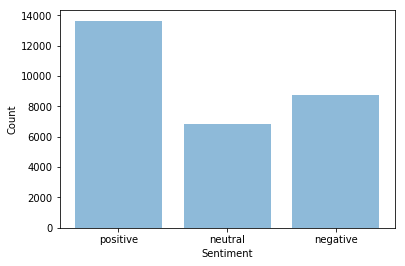

In [184]:
plt.bar(y_pos, counts, align = 'center', alpha = 0.5)
plt.xticks(y_pos, ['positive', 'neutral', 'negative'])
plt.ylabel('Count')
plt.xlabel('Sentiment')
plt.show()

In [186]:
negative_df = tweets_df[tweets_df['Sentiment'] < 0]

In [187]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [193]:
vectorizer = TfidfVectorizer(ngram_range = (2,3), max_features=100, min_df = 0.001)

# vectorizer = CountVectorizer(ngram_range = (2,3), max_features = 1000, min_df = 0.01, max_df = 0.85)
tdm = vectorizer.fit_transform(negative_df['tweets2'])

In [194]:
vectorizer.get_feature_names()

['aam aadmi',
 'able without',
 'able without link',
 'accept rendered',
 'accept rendered prometheus',
 'adblocker unfriendly',
 'adblocker unfriendly accept',
 'adblocker unfriendly following',
 'air force',
 'amit shah',
 'article text',
 'article text comment',
 'arun jaitley',
 'arvind kejriwal',
 'assembly election',
 'bank account',
 'bharatiya janata',
 'black money',
 'bullet train',
 'cannot query',
 'cannot query send',
 'central bank',
 'comment website',
 'comment website adblocker',
 'common man',
 'dear leader',
 'delete remove',
 'doesnt mean',
 'every single',
 'finance arun',
 'finance arun jaitley',
 'following text',
 'foreign policy',
 'function post',
 'function post article',
 'gdp growth',
 'hate speech',
 'income tax',
 'indira gandhi',
 'itemscredits usr',
 'jammu kashmir',
 'lakh crore',
 'law order',
 'link submission',
 'link submission able',
 'lok sabha',
 'long term',
 'mamata banerjee',
 'manmohan singh',
 'middle class',
 'namo army',
 'nitish kumar',


In [196]:
# TOp 10 workds in TF-IDF ( word, TF-IDF value, index)
top_n = 200
indices = vectorizer.idf_.argsort()[::-1]   # Sort by TF-IDF
features = vectorizer.get_feature_names()   # Word list
top_features = [(features[i], vectorizer.idf_[i], i) for i in indices[:top_n]]

print(top_features)

[('central bank', 7.035823137636573, 21), ('air force', 6.9893031220016795, 8), ('bullet train', 6.944851359430846, 18), ('mamata banerjee', 6.784508709355666, 47), ('gdp growth', 6.784508709355666, 35), ('triple talaq', 6.713049745373522, 88), ('rbi governor', 6.646358370874849, 67), ('finance arun jaitley', 6.6146096725602685, 30), ('jammu kashmir', 6.583838013893515, 40), ('nitish kumar', 6.553985050743834, 51), ('finance arun', 6.553985050743834, 29), ('hate speech', 6.496826636903886, 36), ('terror attack', 6.469427662715771, 85), ('senior leader', 6.469427662715771, 75), ('long term', 6.416783929230349, 46), ('law order', 6.416783929230349, 42), ('yogi adityanath', 6.416783929230349, 99), ('someone else', 6.391466121246059, 78), ('bank account', 6.391466121246059, 15), ('sushma swaraj', 6.342675957076628, 83), ('west bengal', 6.342675957076628, 97), ('lakh crore', 6.319145459666434, 41), ('tamil nadu', 6.319145459666434, 84), ('indira gandhi', 6.273683085589676, 38), ('reserve ba

In [202]:
d = {}
for i in top_features:
    d[i[0]] = i[1]
    
w = WordCloud(background_color='white', max_words= 200, max_font_size= 200, height=2000,
             width = 2000, colormap = 'rainbow').fit_words(d)

In [203]:
w.to_file('C:/IMSProSchool/DS3/reddit_data/namo_final.png')

In [205]:
positive_df = tweets_df[tweets_df['Sentiment'] > 0.6]

In [207]:
vectorizer_pos = TfidfVectorizer(ngram_range=(2,3), max_features=100, min_df=0.0025, max_df=0.8)

tdm_pos = vectorizer_pos.fit_transform(positive_df['tweets2'])

In [208]:
vectorizer_pos.get_feature_names()

['aadhar card',
 'amit shah',
 'anti national',
 'best best',
 'best leader',
 'best thing',
 'best world',
 'better option',
 'bhakti best',
 'brilliant idea',
 'came hatred',
 'came hatred kejriwal',
 'chamchas he',
 'collage know',
 'collect pic',
 'congressmukt bharat',
 'conspiracy nut',
 'dear leader',
 'delete remove',
 'diverse culture',
 'fly kite',
 'great job',
 'great leader',
 'great work',
 'indira gandhi',
 'itemscredits usr',
 'japan safety',
 'kaka still bet',
 'kakas jumla shut',
 'kejriwal increasingly',
 'kejriwal increasingly supporting',
 'kejriwal ramon',
 'kejriwal ramon magsaysay',
 'leader modiji',
 'lol look',
 'lol namo',
 'lol rahul',
 'lol yes',
 'magsaysay award',
 'magsaysay award winner',
 'mahatma gandhi',
 'marvelous achievement',
 'may may',
 'modiji best',
 'namo app',
 'namo army',
 'namo awesome',
 'namo awesome panel',
 'namo fan',
 'namo fan collect',
 'namo marvelous',
 'namo marvelous achievement',
 'namo namo',
 'namo win',
 'national level',

In [209]:
# Top 10 workds in TF-IDF ( word, TF-IDF value, index) for Positive posts
top_n = 200
indices_pos = vectorizer_pos.idf_.argsort()[::-1]   # Sort by TF-IDF
features_pos = vectorizer_pos.get_feature_names()   # Word list
top_features_pos = [(features_pos[i], vectorizer_pos.idf_[i], i) for i in indices_pos[:top_n]]

print(top_features_pos)

[('win without', 5.994957481377026, 99), ('modiji best', 5.994957481377026, 43), ('lol look', 5.994957481377026, 34), ('lol namo', 5.994957481377026, 35), ('lol rahul', 5.994957481377026, 36), ('magsaysay award', 5.994957481377026, 38), ('magsaysay award winner', 5.994957481377026, 39), ('mahatma gandhi', 5.994957481377026, 40), ('marvelous achievement', 5.994957481377026, 41), ('may may', 5.994957481377026, 42), ('namo app', 5.994957481377026, 44), ('opp namo', 5.994957481377026, 57), ('namo awesome', 5.994957481377026, 46), ('namo awesome panel', 5.994957481377026, 47), ('win people', 5.994957481377026, 98), ('namo marvelous', 5.994957481377026, 50), ('namo marvelous achievement', 5.994957481377026, 51), ('namo win', 5.994957481377026, 53), ('national level', 5.994957481377026, 54), ('need strong', 5.994957481377026, 55), ('leader modiji', 5.994957481377026, 33), ('kejriwal ramon magsaysay', 5.994957481377026, 32), ('kejriwal ramon', 5.994957481377026, 31), ('kejriwal increasingly su

In [212]:
d_pos = {}
for i in top_features_pos:
    d_pos[i[0]] = i[1]
    
w_pos = WordCloud(background_color='white', max_words= 200, max_font_size= 200, height=2000,
             width = 2000, colormap = 'rainbow').fit_words(d_pos)

In [213]:
w_pos.to_file('C:/IMSProSchool/DS3/reddit_data/namo_final_pos.png')